In [56]:
import pandas as pd
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile(r'C:\Users\DELL\Downloads\Chicago_Crime_2001-2022.zip','r') as zip_ref:
    zip_ref.extractall(r'C:\Users\DELL\Downloads\Chicago_Crime_2001-2022.')

# List all the files extracted
files = os.listdir(r'C:\Users\DELL\Downloads\Chicago_Crime_2001-2022')
files


['Data']

In [57]:
import pandas as pd
import os

# Path to the extracted files
extraction_path = r'C:\Users\DELL\Downloads\Chicago_Crime_2001-2022\Data'

# Initialize an empty dataframe
crime_data = pd.DataFrame()

# List all the files extracted to ensure the directory path is correct
files = os.listdir(extraction_path)
print("Files in directory:", files)

# Loop through each file and append to the dataframe
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(extraction_path, file)
        print(f"Reading file: {file_path}")  # Debugging: print file being read
        df = pd.read_csv(file_path)
        crime_data = pd.concat([crime_data, df], ignore_index=True)

# Display the first few rows of the combined dataframe
print(crime_data.head())


Files in directory: ['Chicago-Crime_2001.csv', 'Chicago-Crime_2002.csv', 'Chicago-Crime_2003.csv', 'Chicago-Crime_2004.csv', 'Chicago-Crime_2005.csv', 'Chicago-Crime_2006.csv', 'Chicago-Crime_2007.csv', 'Chicago-Crime_2008.csv', 'Chicago-Crime_2009.csv', 'Chicago-Crime_2010.csv', 'Chicago-Crime_2011.csv', 'Chicago-Crime_2012.csv', 'Chicago-Crime_2013.csv', 'Chicago-Crime_2014.csv', 'Chicago-Crime_2015.csv', 'Chicago-Crime_2016.csv', 'Chicago-Crime_2017.csv', 'Chicago-Crime_2018.csv', 'Chicago-Crime_2019.csv', 'Chicago-Crime_2020.csv', 'Chicago-Crime_2021.csv', 'Chicago-Crime_2022.csv', 'README.txt']
Reading file: C:\Users\DELL\Downloads\Chicago_Crime_2001-2022\Data\Chicago-Crime_2001.csv
Reading file: C:\Users\DELL\Downloads\Chicago_Crime_2001-2022\Data\Chicago-Crime_2002.csv
Reading file: C:\Users\DELL\Downloads\Chicago_Crime_2001-2022\Data\Chicago-Crime_2003.csv
Reading file: C:\Users\DELL\Downloads\Chicago_Crime_2001-2022\Data\Chicago-Crime_2004.csv
Reading file: C:\Users\DELL\Downl

In [58]:
crime_data.head()

ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [59]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')


In [60]:
crime_dataa=crime_data.copy()

In [61]:
crime_data.set_index('Date', inplace=True)
crime_data.sort_index(inplace=True)
crime_data.head()


ID                Primary Type  \
Date                                              
2001-01-01  3214584                       THEFT   
2001-01-01  1927872                       THEFT   
2001-01-01  4768442  OFFENSE INVOLVING CHILDREN   
2001-01-01  2280620                       THEFT   
2001-01-01  9755214                 SEX OFFENSE   

                              Description               Location Description  \
Date                                                                           
2001-01-01  FINANCIAL ID THEFT: OVER $300                             STREET   
2001-01-01        AGG: FINANCIAL ID THEFT                          RESIDENCE   
2001-01-01  SEX ASSLT OF CHILD BY FAM MBR                          RESIDENCE   
2001-01-01  FINANCIAL ID THEFT: OVER $300                          RESIDENCE   
2001-01-01      AGG CRIMINAL SEXUAL ABUSE  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   

            Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  
Date                                                                      
2001-01-01   False     False  2221      22.0  21.0  41.732563 -87.669923  
2001-01-01   False     False   812       8.0   NaN  41.778094 -87.770137  
2001-01-01   False     False  2124       2.0   4.0  41.807275 -87.593707  
2001-01-01   False     False   915       9.0  20.0  41.806311 -87.674782  
2001-01-01   False     False  1022      10.0  24.0        NaN        NaN

In [62]:
daily_crime_counts = crime_data.resample('D').size()
daily_crime_counts.head()


Date
2001-01-01    1825
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
Freq: D, dtype: int64

In [63]:
import holidays

us_holidays = holidays.US()

# Create a new column in the DataFrame indicating whether each date is a holiday
daily_crime_counts = daily_crime_counts.to_frame(name='Crime_Count')
daily_crime_counts['Holiday'] = daily_crime_counts.index.to_series().apply(lambda x: x in us_holidays)
daily_crime_counts.head()


Crime_Count  Holiday
Date                            
2001-01-01         1825     True
2001-01-02         1143    False
2001-01-03         1151    False
2001-01-04         1166    False
2001-01-05         1267    False

## Topic 1: Crimes Across the Years 

# Question 1: Is the total number of crimes increasing or decreasing across the years?

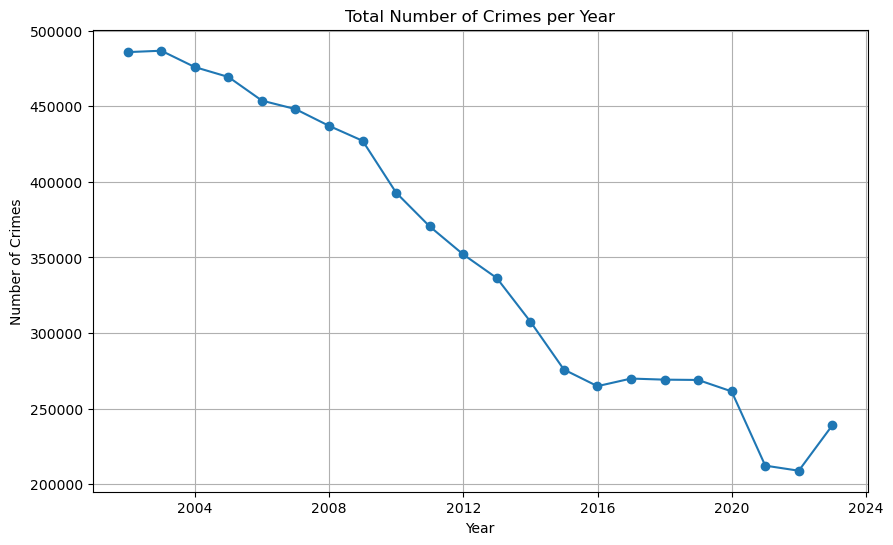

In [64]:
import matplotlib.pyplot as plt

# Resample yearly and plot
yearly_crime_counts = crime_data.resample('Y').size()

plt.figure(figsize=(10, 6))
plt.plot(yearly_crime_counts.index, yearly_crime_counts, marker='o')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


### Question 2: Are there any individual crimes that are doing the opposite?

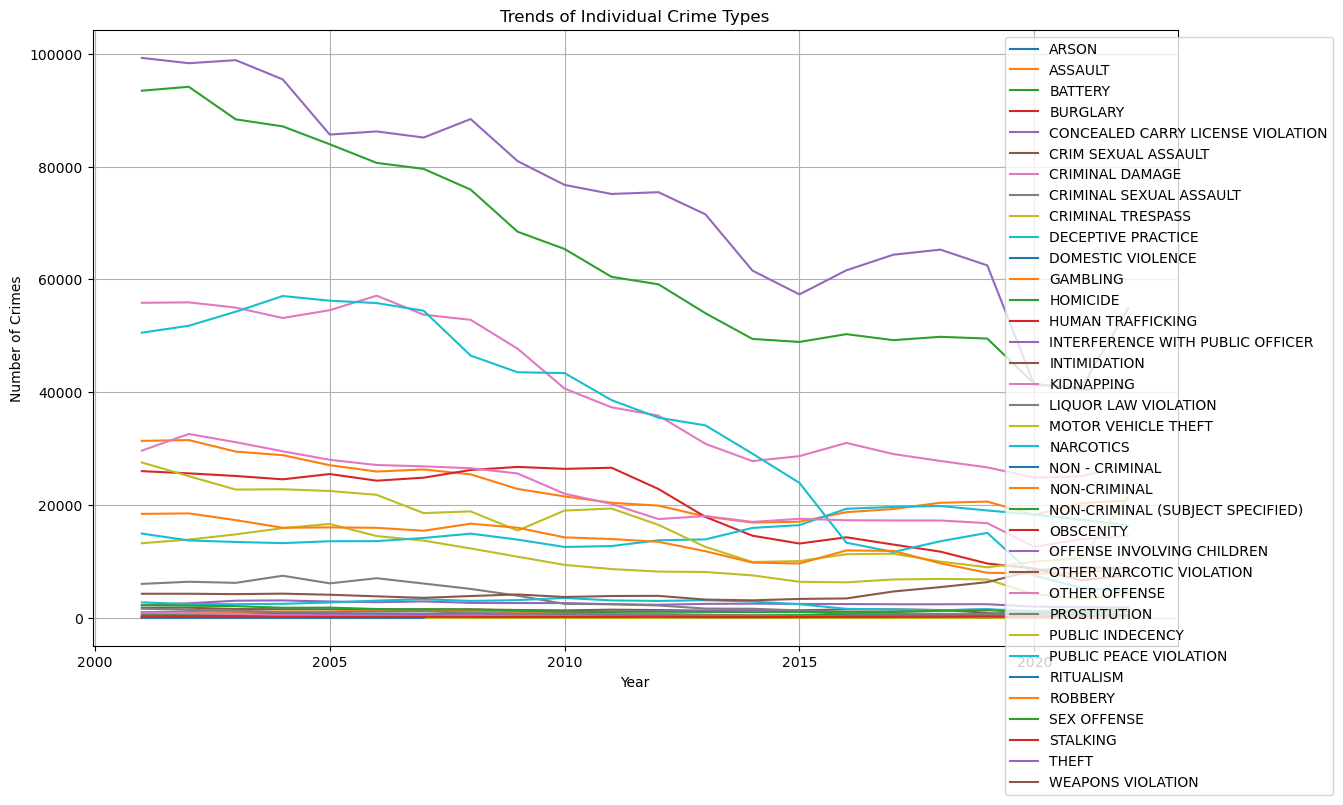

In [65]:
# Group by primary type and year
crime_by_type_and_year = crime_data.groupby([crime_data.index.year, 'Primary Type']).size().unstack()

# Plot trends for individual crime types
plt.figure(figsize=(14, 8))
for crime_type in crime_by_type_and_year.columns:
    plt.plot(crime_by_type_and_year.index, crime_by_type_and_year[crime_type], label=crime_type)

plt.title('Trends of Individual Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()


### Topic 2: Comparing AM vs. PM Rush Hour

# Question 1: Are crimes more common during AM rush hour or PM rush hour?

In [66]:
# Define rush hour periods
am_rush = crime_data.between_time('07:00', '10:00')
pm_rush = crime_data.between_time('16:00', '19:00')

# Count crimes during rush hours
am_rush_counts = am_rush.resample('D').size()
pm_rush_counts = pm_rush.resample('D').size()

# Aggregate to see total counts
total_am_rush = am_rush_counts.sum()
total_pm_rush = pm_rush_counts.sum()

total_am_rush, total_pm_rush


(886375, 1337497)

### Question 2: Top 5 most common crimes during AM and PM rush hour?

In [67]:
# Get top 5 crimes during AM rush hour
top_am_crimes = am_rush['Primary Type'].value_counts().head(5)

# Get top 5 crimes during PM rush hour
top_pm_crimes = pm_rush['Primary Type'].value_counts().head(5)

top_am_crimes, top_pm_crimes


(THEFT              220879
 BATTERY            118612
 CRIMINAL DAMAGE     93153
 BURGLARY            84944
 OTHER OFFENSE       73991
 Name: Primary Type, dtype: int64,
 THEFT              333344
 BATTERY            228265
 CRIMINAL DAMAGE    155030
 NARCOTICS          107795
 ASSAULT             95933
 Name: Primary Type, dtype: int64)

#### Question 3: Are Motor Vehicle Thefts more common during AM or PM Rush Hour?

In [68]:
# Filter Motor Vehicle Thefts during rush hours
am_motor_vehicle_theft = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].resample('D').size()
pm_motor_vehicle_theft = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].resample('D').size()

# Aggregate to see total counts
total_am_motor_vehicle_theft = am_motor_vehicle_theft.sum()
total_pm_motor_vehicle_theft = pm_motor_vehicle_theft.sum()

total_am_motor_vehicle_theft, total_pm_motor_vehicle_theft


(48764, 66116)

# Topic 3: Comparing Holidays
### Question 1: What are the top 3 holidays with the largest number of crimes?

In [69]:
# Filter crimes that happened on holidays
holiday_crimes = daily_crime_counts[daily_crime_counts['Holiday']]

# Group by date and sort to find top 3 holidays with most crimes
top_holidays = holiday_crimes.sort_values(by='Crime_Count', ascending=False).head(3)

top_holidays


Crime_Count  Holiday
Date                            
2003-01-01         2033     True
2005-01-01         1978     True
2007-01-01         1963     True

### Question 2: For each of the top 3 holidays with the most crime, what are the top 5 most common crimes?

In [70]:
# Get dates of top 3 holidays
top_holiday_dates = top_holidays.index

# Filter original crime data for these holidays and get top 5 crimes
top_holiday_crimes = {}
for date in top_holiday_dates:
    crimes_on_holiday = crime_data[crime_data.index.date == date.date()]['Primary Type'].value_counts().head(5)
    top_holiday_crimes[date.date()] = crimes_on_holiday

top_holiday_crimes


{datetime.date(2003, 1, 1): THEFT                         472
 BATTERY                       381
 CRIMINAL DAMAGE               251
 OTHER OFFENSE                 181
 OFFENSE INVOLVING CHILDREN    127
 Name: Primary Type, dtype: int64,
 datetime.date(2005, 1, 1): THEFT                         466
 BATTERY                       381
 CRIMINAL DAMAGE               202
 OTHER OFFENSE                 152
 OFFENSE INVOLVING CHILDREN    146
 Name: Primary Type, dtype: int64,
 datetime.date(2007, 1, 1): THEFT                         546
 BATTERY                       371
 CRIMINAL DAMAGE               212
 OFFENSE INVOLVING CHILDREN    118
 NARCOTICS                     114
 Name: Primary Type, dtype: int64}

In [71]:
print(crime_data.columns)


Index(['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude'],
      dtype='object')


In [72]:
crime_dataa

ID                Date        Primary Type  \
0         1326041 2001-01-01 01:00:00             BATTERY   
1         1319931 2001-01-01 13:00:00             BATTERY   
2         1324743 2001-01-01 13:00:00            GAMBLING   
3         1310717 2001-01-01 01:00:00     CRIMINAL DAMAGE   
4         1318099 2001-01-01 01:00:00             BATTERY   
...           ...                 ...                 ...   
7713104  12938029 2022-12-31 12:50:00             ASSAULT   
7713105  12937822 2022-12-31 12:50:00             ASSAULT   
7713106  12937583 2022-12-31 00:52:00             BATTERY   
7713107  12938420 2022-12-31 12:52:00             ASSAULT   
7713108  12939906 2022-12-31 12:59:00  DECEPTIVE PRACTICE   

                                     Description  \
0                                         SIMPLE   
1                                         SIMPLE   
2                            ILLEGAL ILL LOTTERY   
3                                     TO VEHICLE   
4                                         SIMPLE   
...                                          ...   
7713104                                   SIMPLE   
7713105                     AGGRAVATED - HANDGUN   
7713106                                   SIMPLE   
7713107                                   SIMPLE   
7713108  FINANCIAL IDENTITY THEFT $300 AND UNDER   

                 Location Description  Arrest  Domestic  Beat  District  Ward  \
0                           RESIDENCE   False     False  1624      16.0   NaN   
1                           RESIDENCE   False      True   825       8.0   NaN   
2                              STREET    True     False   313       3.0   NaN   
3                              STREET   False     False  2424      24.0   NaN   
4             RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN   
...                               ...     ...       ...   ...       ...   ...   
7713104                     APARTMENT   False     False  1014      10.0  24.0   
7713105                     APARTMENT   False      True   733       7.0   6.0   
7713106                    BARBERSHOP   False     False  1135      11.0  28.0   
7713107  COMMERCIAL / BUSINESS OFFICE   False     False  1432      14.0  32.0   
7713108                     RESIDENCE   False     False  1511      15.0  29.0   

          Latitude  Longitude  
0        41.957850 -87.749185  
1        41.783892 -87.684841  
2        41.780412 -87.611970  
3        42.012391 -87.678032  
4        41.819538 -87.620020  
...            ...        ...  
7713104  41.855911 -87.719966  
7713105  41.766546 -87.645669  
7713106  41.868829 -87.686098  
7713107  41.930693 -87.685657  
7713108        NaN        NaN  

[7713109 rows x 12 columns]

In [74]:
import pandas as pd
import os

# Assuming crime_data is the combined dataframe from Part 1
# Ensure the 'Date' column is in datetime format
crime_dataa['Date'] = pd.to_datetime(crime_dataa['Date'])

# Extract year and month from the 'Date' column
crime_dataa['YearMonth'] = crime_dataa['Date'].dt.to_period('M')

# Filter data for selected crimes
theft_data = crime_dataa[crime_dataa['Primary Type'] == 'THEFT']
battery_data = crime_dataa[crime_dataa['Primary Type'] == 'BATTERY']

# Group by 'YearMonth' and count occurrences
theft_monthly = theft_data.groupby('YearMonth').size()
battery_monthly = battery_data.groupby('YearMonth').size()

# Convert to time series
theft_ts = theft_monthly.to_timestamp()
battery_ts = battery_monthly.to_timestamp()

# Display the first few rows
print(theft_ts.head())
print(battery_ts.head())


YearMonth
2001-01-01    7867
2001-02-01    6669
2001-03-01    7766
2001-04-01    7702
2001-05-01    8420
Freq: MS, dtype: int64
YearMonth
2001-01-01    6527
2001-02-01    6042
2001-03-01    7662
2001-04-01    8328
2001-05-01    8887
Freq: MS, dtype: int64


In [75]:
# Check for null values
print(theft_ts.isnull().sum())
print(battery_ts.isnull().sum())

# Address null values if any (in this case, we assume there are none)
theft_ts = theft_ts.fillna(0)
battery_ts = battery_ts.fillna(0)


0
0


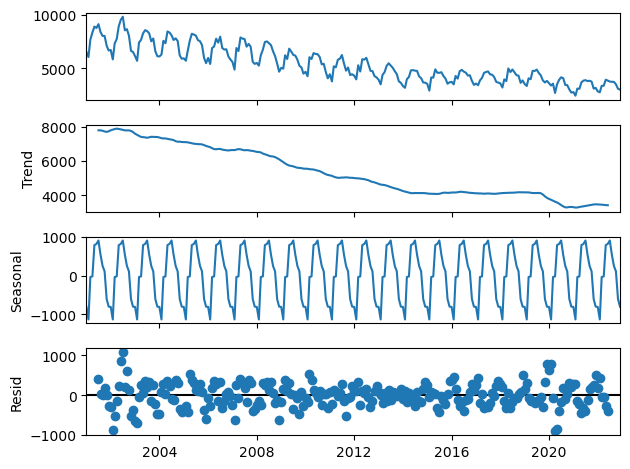

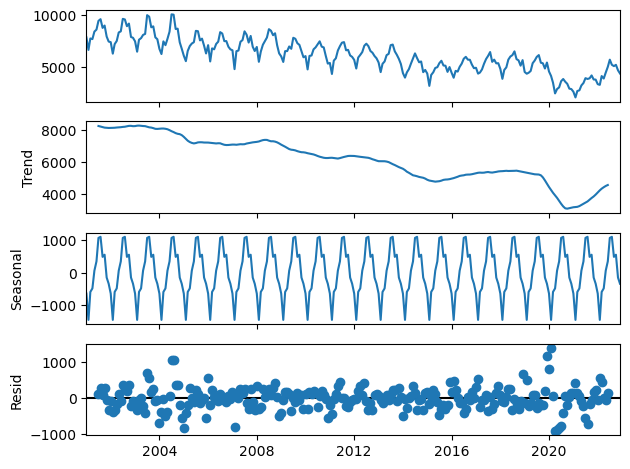

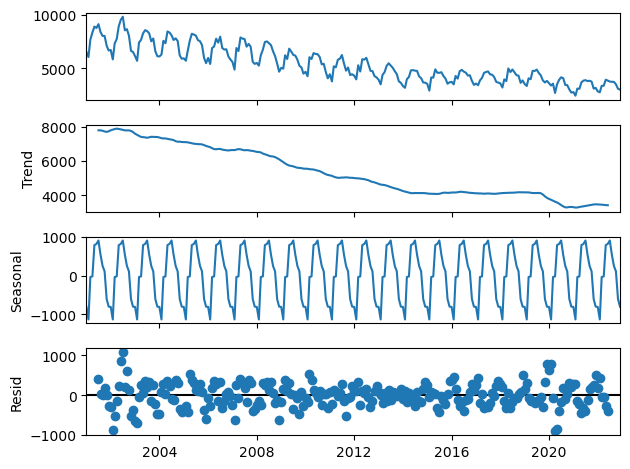

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decompose_theft = seasonal_decompose(theft_ts, model='additive')
decompose_battery = seasonal_decompose(battery_ts, model='additive')

# Plot the decompositions
decompose_theft.plot()
decompose_battery.plot()


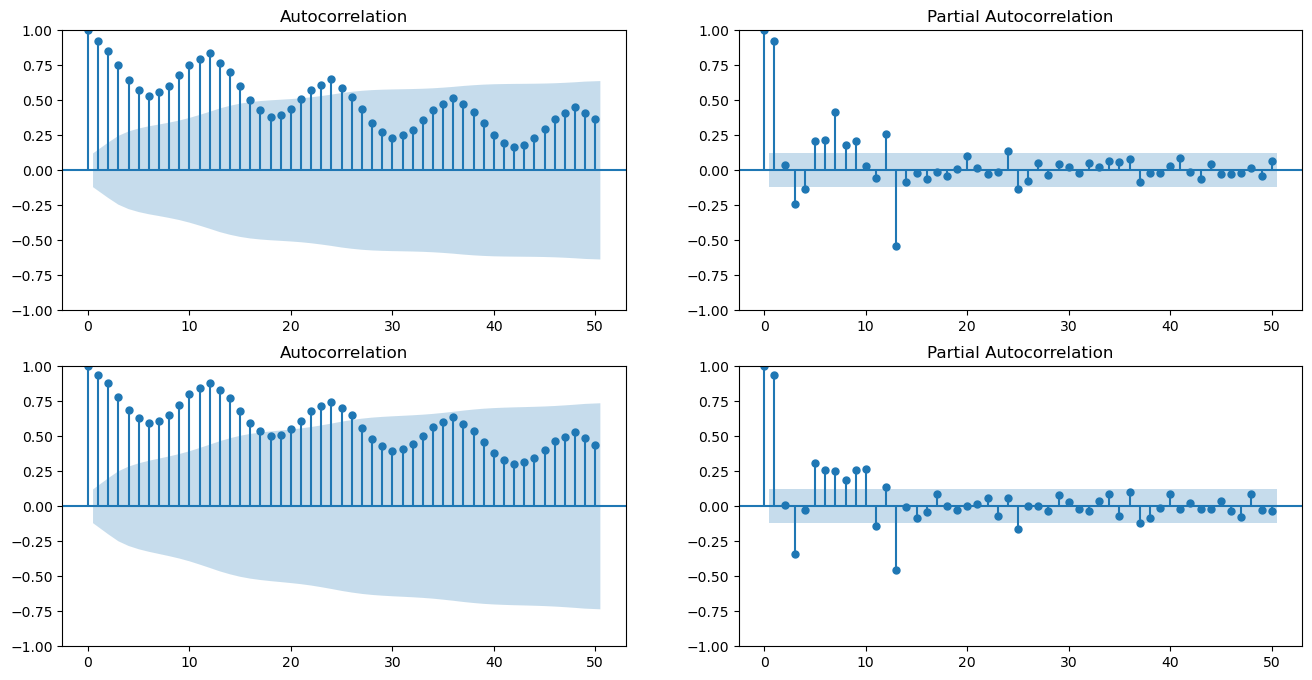

In [77]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plot_acf(theft_ts, lags=50, ax=ax[0, 0])
plot_pacf(theft_ts, lags=50, ax=ax[0, 1])
plot_acf(battery_ts, lags=50, ax=ax[1, 0])
plot_pacf(battery_ts, lags=50, ax=ax[1, 1])
plt.show()


In [78]:
# Define the split point (last 6 months for testing)
split_point = -6

# Split the data
theft_train, theft_test = theft_ts[:split_point], theft_ts[split_point:]
battery_train, battery_test = battery_ts[:split_point], battery_ts[split_point:]

print(theft_train.tail())
print(theft_test.head())


YearMonth
2022-02-01    3326
2022-03-01    4166
2022-04-01    3930
2022-05-01    4497
2022-06-01    5044
Freq: MS, dtype: int64
YearMonth
2022-07-01    5734
2022-08-01    5244
2022-09-01    5117
2022-10-01    5242
2022-11-01    4717
Freq: MS, dtype: int64


In [80]:
from statsmodels.tsa.arima.model import ARIMA
p=1
d=1
q=1
# Fit ARIMA model for Theft
arima_theft = ARIMA(theft_train, order=(p, d, q))  # Replace (p, d, q) with actual orders
arima_theft_fit = arima_theft.fit()

# Fit ARIMA model for Battery
arima_battery = ARIMA(battery_train, order=(p, d, q))  # Replace (p, d, q) with actual orders
arima_battery_fit = arima_battery.fit()

# Summarize the models
print(arima_theft_fit.summary())
print(arima_battery_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2021.066
Date:                Sun, 09 Jun 2024   AIC                           4048.131
Time:                        15:10:34   BIC                           4058.778
Sample:                    01-01-2001   HQIC                          4052.413
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4936      0.370     -1.335      0.182      -1.218       0.231
ma.L1          0.3794      0.391      0.971      0.331      -0.386       1.145
sigma2      3.961e+05   3.89e+04     10.182      0.0

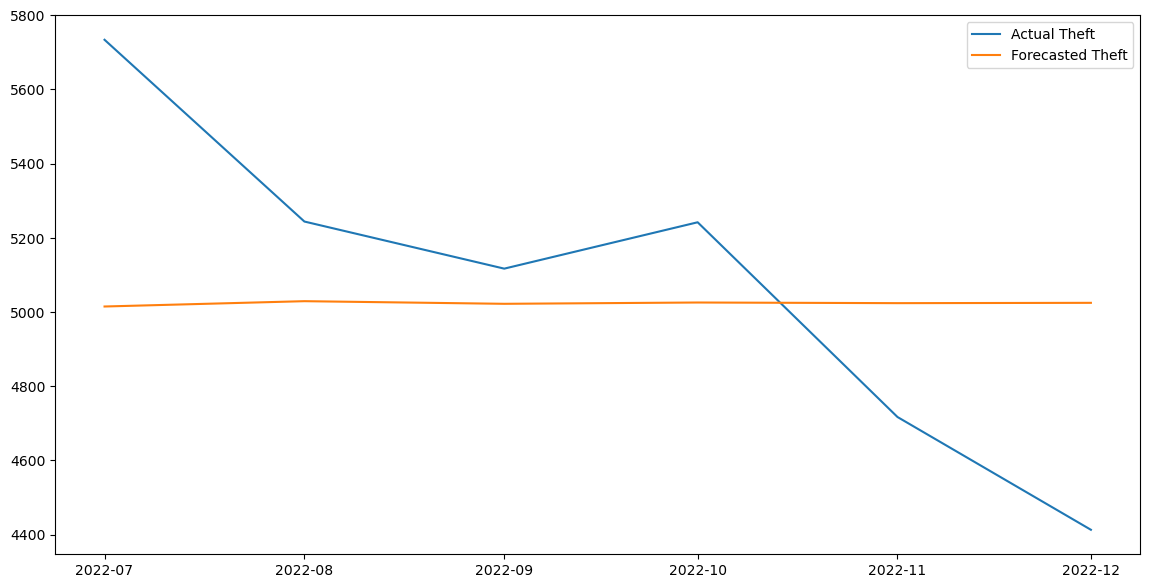

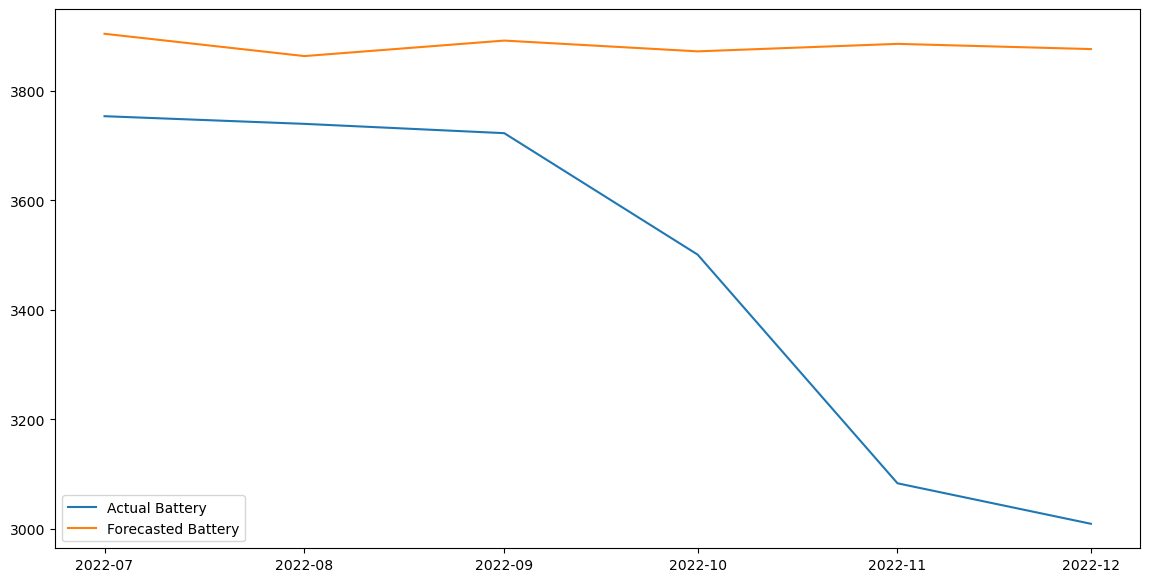

In [81]:
# Forecast for the next 6 months
theft_forecast = arima_theft_fit.forecast(steps=6)
battery_forecast = arima_battery_fit.forecast(steps=6)

# Plot forecasts versus test data
plt.figure(figsize=(14, 7))
plt.plot(theft_test, label='Actual Theft')
plt.plot(theft_forecast, label='Forecasted Theft')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(battery_test, label='Actual Battery')
plt.plot(battery_forecast, label='Forecasted Battery')
plt.legend()
plt.show()


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
theft_mse = mean_squared_error(theft_test, theft_forecast)
theft_mae = mean_absolute_error(theft_test, theft_forecast)

battery_mse = mean_squared_error(battery_test, battery_forecast)
battery_mae = mean_absolute_error(battery_test, battery_forecast)

print(f"Theft MSE: {theft_mse}, Theft MAE: {theft_mae}")
print(f"Battery MSE: {battery_mse}, Battery MAE: {battery_mae}")


Theft MSE: 181248.76106953205, Theft MAE: 360.6141449631803
Battery MSE: 267134.6576956669, Battery MAE: 414.3746270523579


In [83]:
import pmdarima as pm

# Auto ARIMA for Theft
auto_arima_theft = pm.auto_arima(theft_train, seasonal=True, m=12)
print(auto_arima_theft.summary())

# Auto ARIMA for Battery
auto_arima_battery = pm.auto_arima(battery_train, seasonal=True, m=12)
print(auto_arima_battery.summary())


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.634
Date:                                 Sun, 09 Jun 2024   AIC                           3741.268
Time:                                         15:13:03   BIC                           3759.013
Sample:                                     01-01-2001   HQIC                          3748.404
                                          - 06-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2251      0.046     -4.934      0.000      -0.315      -0

C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
  

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  258
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1833.518
Date:                              Sun, 09 Jun 2024   AIC                           3677.037
Time:                                      15:13:58   BIC                           3694.782
Sample:                                  01-01-2001   HQIC                          3684.173
                                       - 06-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3590      0.056     -6.388      0.000      -0.469      -0.249
ar.L2         -0.12

C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
  

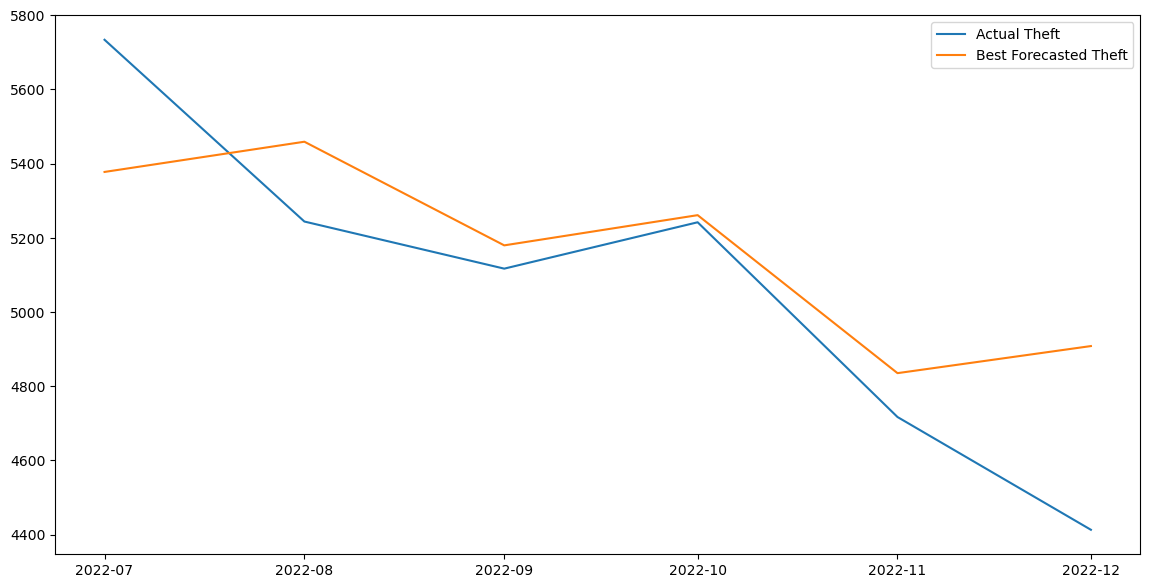

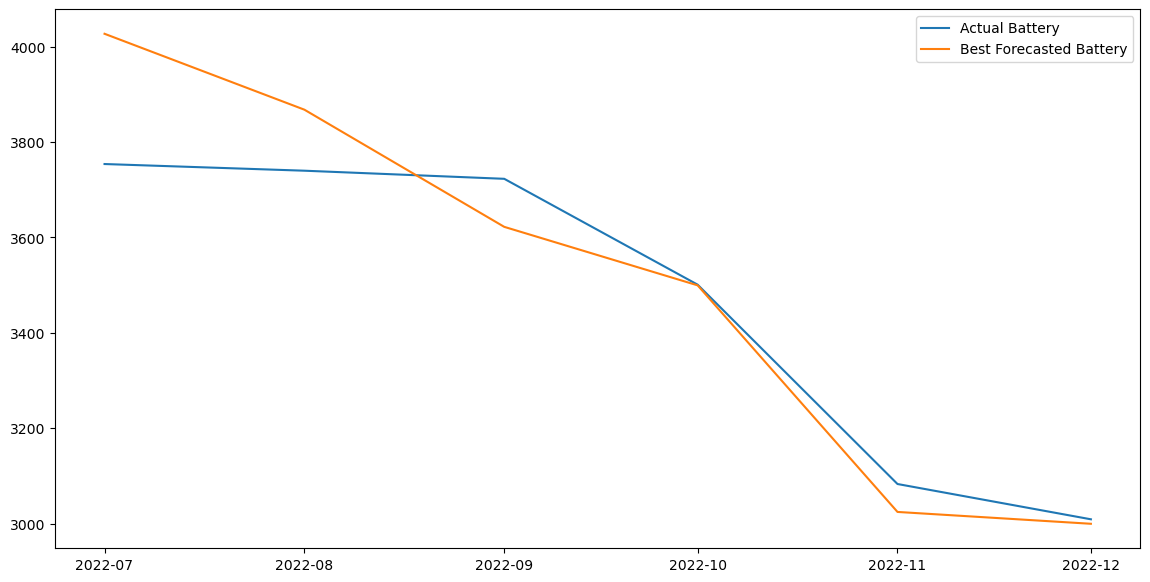

Best Theft MSE: 72805.23522053949, Best Theft MAE: 211.15875810049906
Best Battery MSE: 17440.37423530932, Best Battery MAE: 95.20128959253498


In [84]:
# Fit the models with best parameters from auto_arima
best_theft_model = ARIMA(theft_train, order=auto_arima_theft.order, seasonal_order=auto_arima_theft.seasonal_order)
best_theft_model_fit = best_theft_model.fit()

best_battery_model = ARIMA(battery_train, order=auto_arima_battery.order, seasonal_order=auto_arima_battery.seasonal_order)
best_battery_model_fit = best_battery_model.fit()

# Forecast and evaluate
best_theft_forecast = best_theft_model_fit.forecast(steps=6)
best_battery_forecast = best_battery_model_fit.forecast(steps=6)

# Plot best forecasts versus test data
plt.figure(figsize=(14, 7))
plt.plot(theft_test, label='Actual Theft')
plt.plot(best_theft_forecast, label='Best Forecasted Theft')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(battery_test, label='Actual Battery')
plt.plot(best_battery_forecast, label='Best Forecasted Battery')
plt.legend()
plt.show()

# Evaluate best models
best_theft_mse = mean_squared_error(theft_test, best_theft_forecast)
best_theft_mae = mean_absolute_error(theft_test, best_theft_forecast)

best_battery_mse = mean_squared_error(battery_test, best_battery_forecast)
best_battery_mae = mean_absolute_error(battery_test, best_battery_forecast)

print(f"Best Theft MSE: {best_theft_mse}, Best Theft MAE: {best_theft_mae}")
print(f"Best Battery MSE: {best_battery_mse}, Best Battery MAE: {best_battery_mae}")


C:\Users\DELL\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


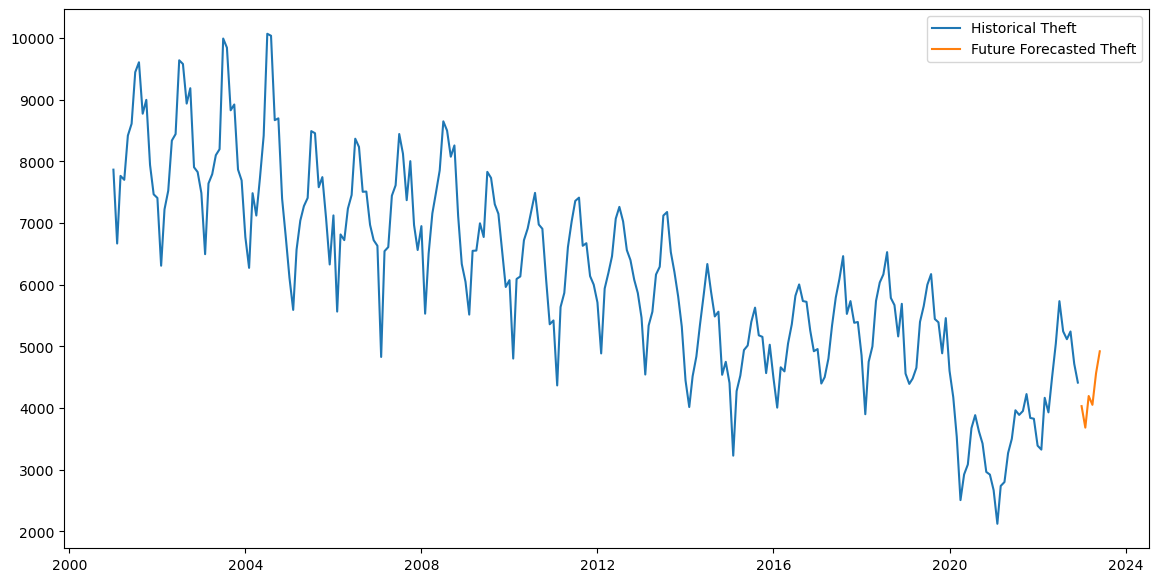

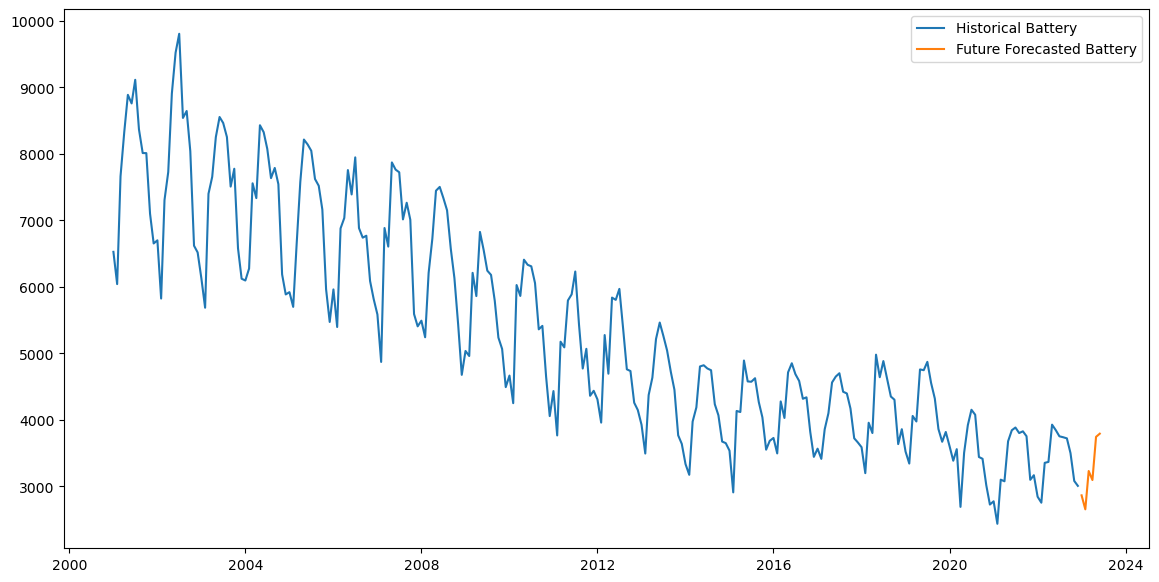

In [85]:
# Fit models on the entire dataset
best_theft_model_full = ARIMA(theft_ts, order=auto_arima_theft.order, seasonal_order=auto_arima_theft.seasonal_order)
best_theft_model_full_fit = best_theft_model_full.fit()

best_battery_model_full = ARIMA(battery_ts, order=auto_arima_battery.order, seasonal_order=auto_arima_battery.seasonal_order)
best_battery_model_full_fit = best_battery_model_full.fit()

# Forecast future crimes
future_theft_forecast = best_theft_model_full_fit.forecast(steps=6)
future_battery_forecast = best_battery_model_full_fit.forecast(steps=6)

# Plot future forecasts
plt.figure(figsize=(14, 7))
plt.plot(theft_ts, label='Historical Theft')
plt.plot(future_theft_forecast, label='Future Forecasted Theft')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(battery_ts, label='Historical Battery')
plt.plot(future_battery_forecast, label='Future Forecasted Battery')
plt.legend()
plt.show()
